In [ ]:
!unzip "/content/drive/MyDrive/dog/dog-breed-identification.zip"

In [1]:
import pandas  as pd
import numpy as np

In [2]:
label = pd.read_csv('/content/drive/MyDrive/dog/labels.csv')

In [ ]:
label

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


<Axes: >

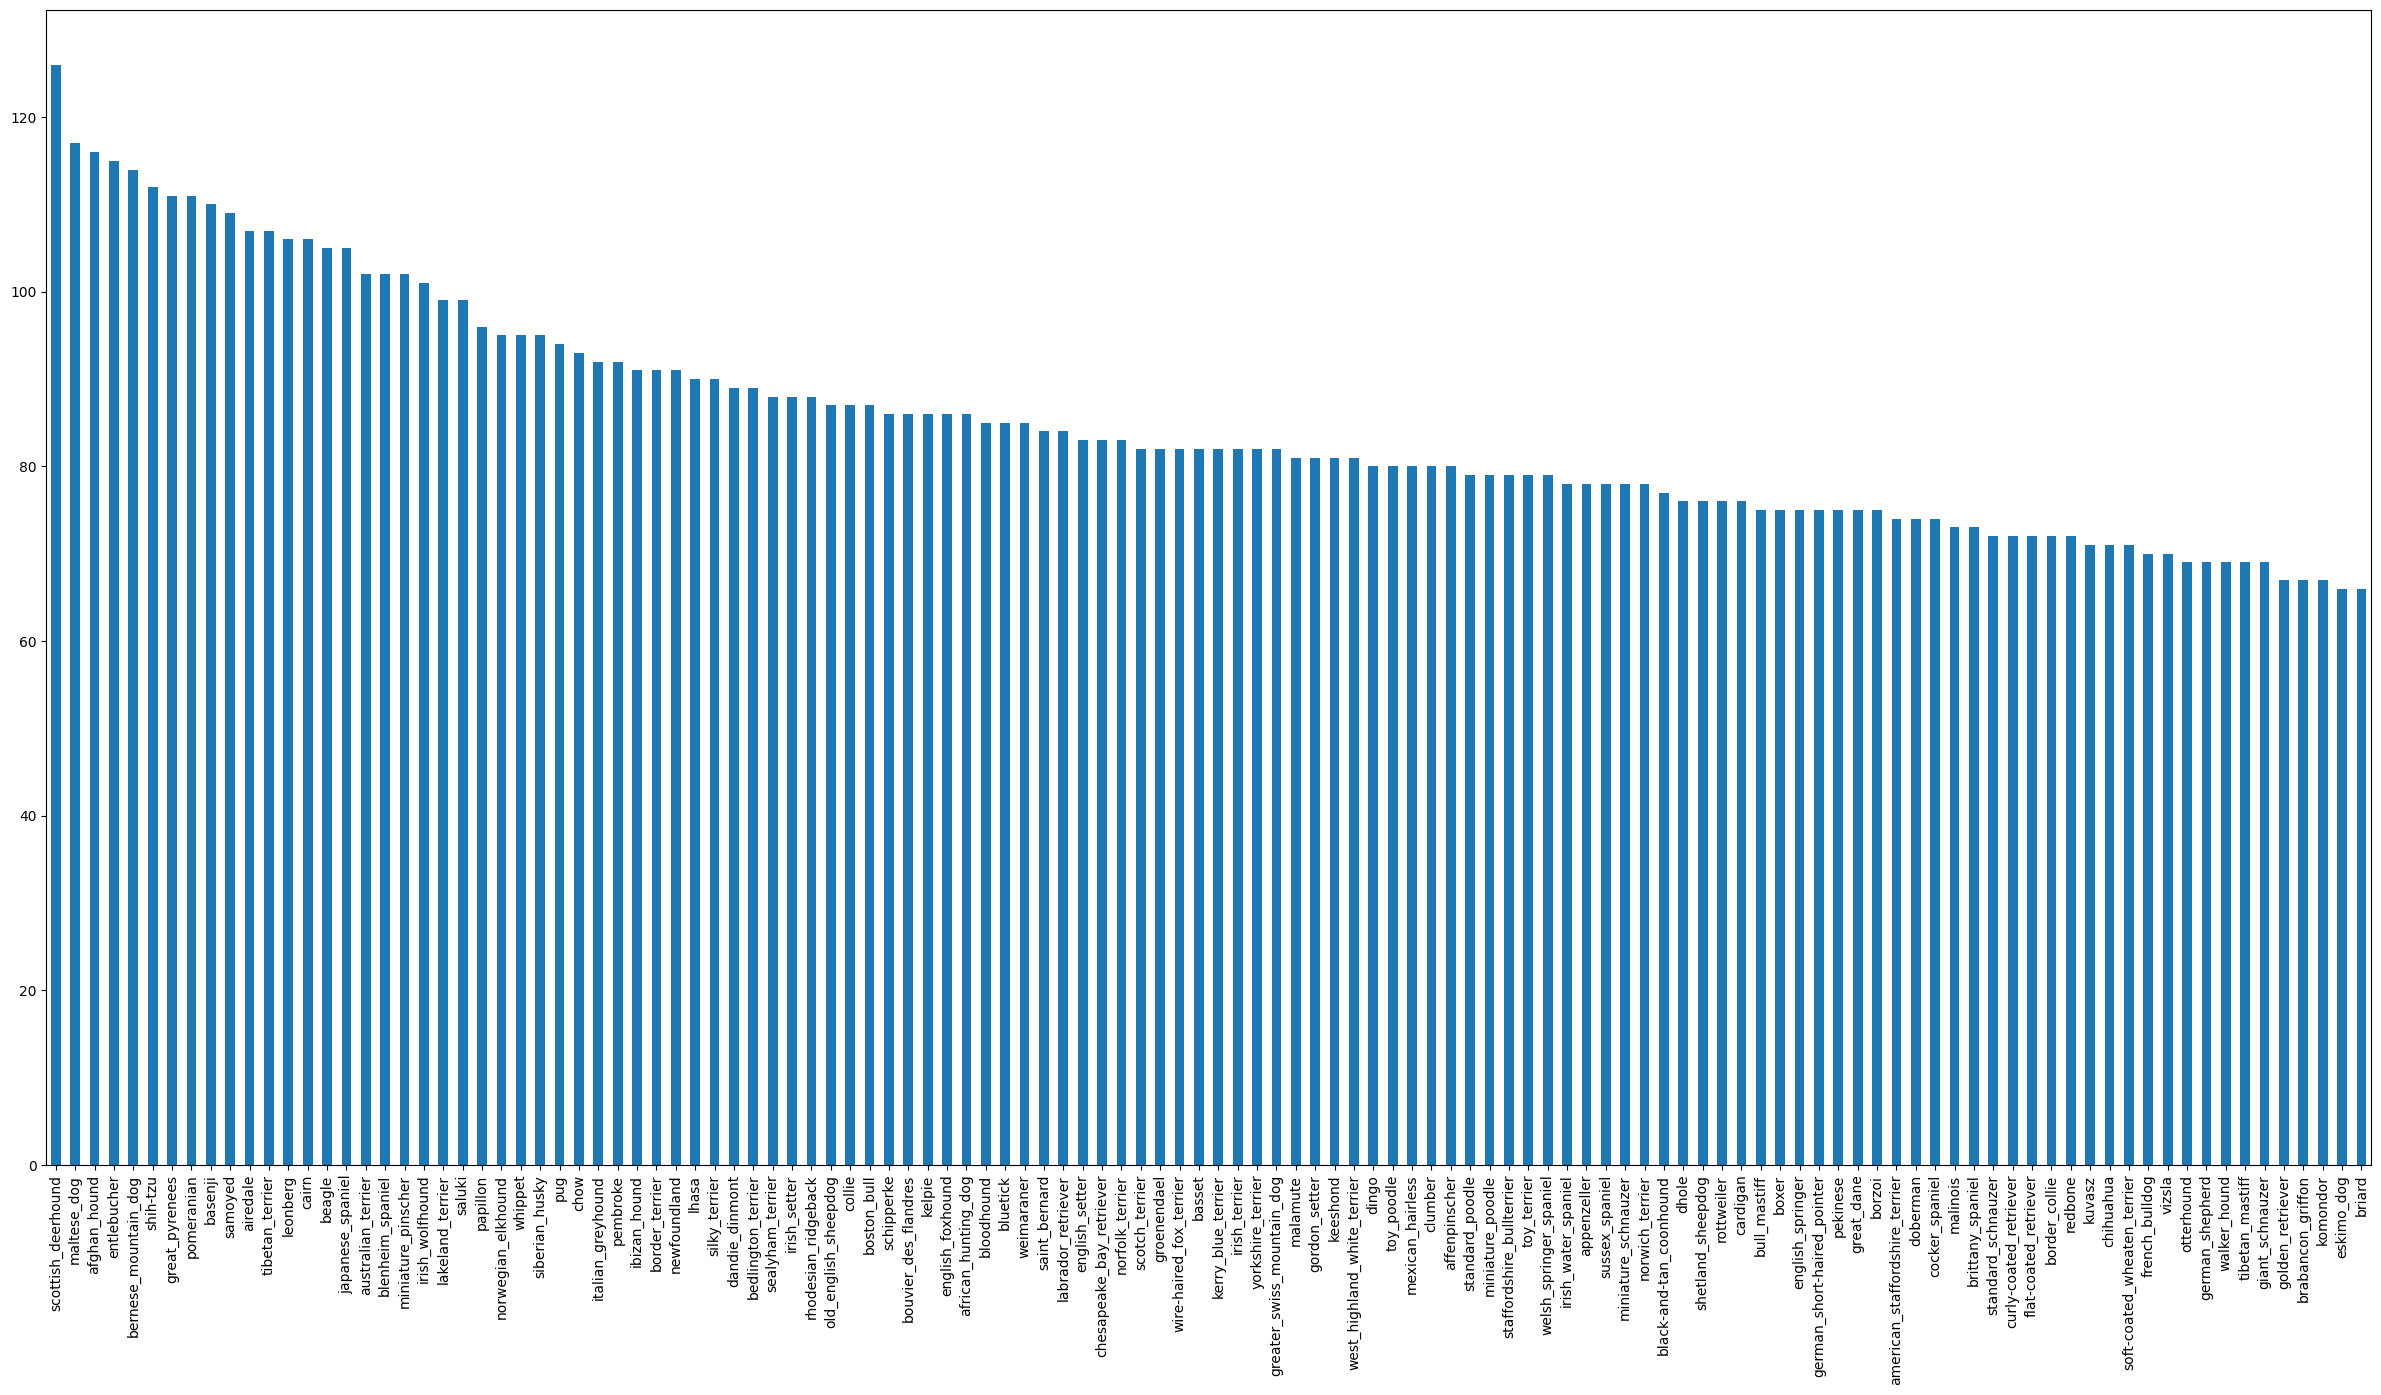

In [ ]:
label['breed'].value_counts().plot(kind='bar',figsize=(30,15))

In [3]:
# importing tensorflow
import tensorflow as tf


In [ ]:
tf.__version__

'2.12.0'

In [4]:
# tensorflow hub
# used to pick a model
import tensorflow_hub as hub

In [ ]:
hub.__version__

'0.13.0'

In [ ]:
# check gpu
print('f' if tf.config.list_physical_devices('GPU') else 'a')

f


Getting our data ready (turning into Tensors)
With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [ ]:
label.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [5]:
from IPython.display import Image

Image('drive/MyDrive/dog/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

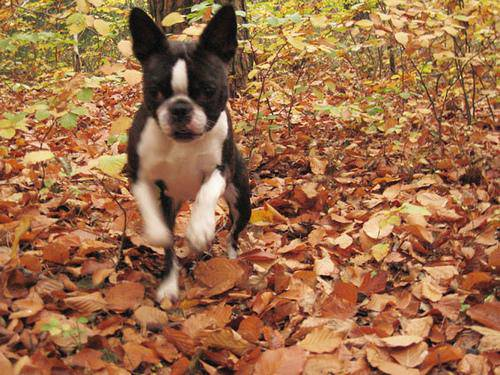

In [ ]:
Image('drive/MyDrive/dog/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [ ]:
label.tail()

,id,breed
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher
10221,fff43b07992508bc822f33d8ffd902ae,chesapeake_bay_retriever


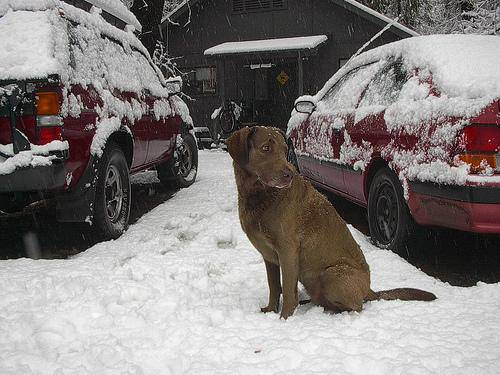

In [ ]:
Image('drive/MyDrive/dog/train/fff43b07992508bc822f33d8ffd902ae.jpg')

In [6]:
names = ["drive/My Drive/dog/train/" + fname + ".jpg" for fname in label["id"]]

In [ ]:
names

['drive/My Drive/dog/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dog/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dog/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dog/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dog/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/dog/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/dog/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/dog/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/dog/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/dog/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/My Drive/dog/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/My Drive/dog/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/My Drive/dog/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/My Drive/dog/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 'drive/My Drive/dog/train/0075dc49dab4024d12fafe67074d8a81.jpg',
 'drive/My

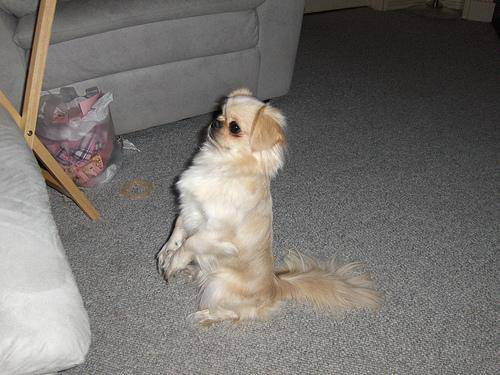

In [ ]:
Image(names[2])

In [ ]:
len(names)

10222

In [7]:
import os

In [ ]:
if len(os.listdir("drive/MyDrive/dog/train/")) == len(names):
  print('yeah')

yeah


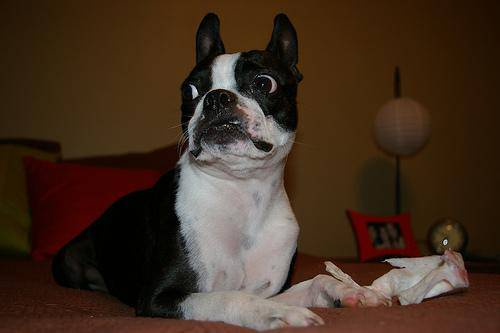

In [ ]:
Image(names[1500])

In [ ]:
label['breed'][1500]

'boston_bull'

#turning labels into numbers

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [8]:
breed = label['breed']

In [ ]:
breed

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [ ]:
breed.shape

(10222,)

In [ ]:
len(names)

10222

In [9]:
unq_breed = np.unique(breed) # to find original no of breeds
# this return an array of all the items that are in the original data without repetetion

In [ ]:
unq_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
label['breed'][0]
label['breed'][0] == unq_breed


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [10]:
#converting every label into array
label_bool = [i==unq_breed for i in label['breed']]

In [ ]:
label_bool[45]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False])

In [ ]:
print(label['breed'][0]) # original label
print(np.where(unq_breed == label['breed'][0])) # index where label occurs
print(label_bool[0].argmax()) # index where label occurs in boolean array
print(label_bool[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
label_bool[3].astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own

In [13]:
X = names
Y=label_bool

We're going to start off experimenting with ~1000 images and increase as needed.

In [11]:
n=1000 #  @param {type:'slider',min:1000,max:10000}

In [14]:
#splitting
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X[:n],Y[:n],test_size=0.2,random_state=42)

In [ ]:
len(X_val)

200

Preprocessing Images (turning images into Tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:

Take an image filepath as input

Use TensorFlow to read the file and save it to variable, image

Turn our image (a jpg) into Tensors

Normalize our image (convert color channel values from from 0-255 to 0-1).

Resize the image to be a shape of (224, 224)

Return the modified image

Before we do, let's see what importing an image looks like.







In [ ]:
print(tf.constant(names)[10])

tf.Tensor(b'drive/My Drive/dog/train/004396df1acd0f1247b740ca2b14616e.jpg', shape=(), dtype=string)


In [15]:
from matplotlib.pyplot import imread

In [ ]:
img = imread(names[10])

In [ ]:
img.shape

(500, 375, 3)

In [ ]:
img.max(), img.min() # piel value ranges from 0  - 255

NameError: ignored

In [16]:
img_size = 224

def preprocess(path,size = img_size):
  image = tf.io.read_file(path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image,channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.cast(image, tf.float32) / 255.0
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image,size=[size,size])
  return image

In [ ]:
ex = tf.io.read_file(names[44])

In [ ]:
ex = tf.image.decode_jpeg(ex,channels=3)

In [ ]:
ex = tf.cast(ex,tf.float32)/255.0

In [ ]:
ex

<tf.Tensor: shape=(333, 500, 3), dtype=float32, numpy=
array([[[0.30980393, 0.31764707, 0.23529412],
        [0.34117648, 0.34901962, 0.26666668],
        [0.38039216, 0.38431373, 0.3137255 ],
        ...,
        [0.8666667 , 0.85882354, 0.87058824],
        [0.8509804 , 0.84313726, 0.85490197],
        [0.84313726, 0.8352941 , 0.84705883]],

       [[0.32156864, 0.32941177, 0.24705882],
        [0.34901962, 0.35686275, 0.27450982],
        [0.38431373, 0.3882353 , 0.31764707],
        ...,
        [0.8627451 , 0.85490197, 0.8666667 ],
        [0.84705883, 0.8392157 , 0.8509804 ],
        [0.8392157 , 0.83137256, 0.84313726]],

       [[0.34509805, 0.34901962, 0.2784314 ],
        [0.3647059 , 0.36862746, 0.29803923],
        [0.3882353 , 0.39215687, 0.32941177],
        ...,
        [0.85490197, 0.84705883, 0.85882354],
        [0.8392157 , 0.83137256, 0.84313726],
        [0.83137256, 0.8235294 , 0.8352941 ]],

       ...,

       [[0.81960785, 0.8352941 , 0.7764706 ],
        [0.64

In [ ]:
preprocess(names[10]) #finished succesfully

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.4175342 , 0.3822401 , 0.40184793],
        [0.43160436, 0.39631024, 0.41591808],
        [0.4060271 , 0.37879497, 0.39571548],
        ...,
        [0.19028023, 0.17067239, 0.18635866],
        [0.28062278, 0.26101494, 0.2767012 ],
        [0.28965282, 0.27004498, 0.28573126]],

       [[0.36733648, 0.33204237, 0.3516502 ],
        [0.3150591 , 0.27976498, 0.29937282],
        [0.29561082, 0.26837867, 0.2852992 ],
        ...,
        [0.23583162, 0.21230221, 0.22014534],
        [0.2812507 , 0.25772128, 0.2655644 ],
        [0.26320195, 0.23967254, 0.24751568]],

       [[0.40703082, 0.3717367 , 0.3907143 ],
        [0.4639669 , 0.4286728 , 0.44765037],
        [0.5020599 , 0.47482774, 0.491118  ],
        ...,
        [0.27574417, 0.24076517, 0.24374135],
        [0.30945447, 0.27447549, 0.27745166],
        [0.2550115 , 0.22003251, 0.22300872]],

       ...,

       [[0.26359692, 0.28712633, 0.24728043],
        [0.26

Turning our data into batches
Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: (image, label).

In [17]:
def img_label(img,label):
  ima = preprocess(img)
  return ima,label

In [ ]:
img_label(X[44],tf.constant(Y[44]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.33140624, 0.33924937, 0.25689644],
         [0.40966466, 0.41358623, 0.342998  ],
         [0.43735573, 0.44096217, 0.3812325 ],
         ...,
         [0.88595057, 0.88595057, 0.88595057],
         [0.8756914 , 0.8678483 , 0.879613  ],
         [0.84701496, 0.8391718 , 0.85093653]],
 
        [[0.3521279 , 0.35710865, 0.28334287],
         [0.40803254, 0.4119541 , 0.34709066],
         [0.45327476, 0.4568812 , 0.4026095 ],
         ...,
         [0.87725836, 0.87725836, 0.87725836],
         [0.8669992 , 0.8591561 , 0.8709208 ],
         [0.83832276, 0.8304796 , 0.8422443 ]],
 
        [[0.3905112 , 0.39443278, 0.32554272],
         [0.4263719 , 0.43029347, 0.36924654],
         [0.4804272 , 0.4832528 , 0.43067923],
         ...,
         [0.87043756, 0.87043756, 0.87043756],
         [0.85951495, 0.8516718 , 0.8634365 ],
         [0.8290178 , 0.8211747 , 0.8329394 ]],
 
        ...,
 
        [[0.5583288 , 0.57127315

In [18]:
batch_size=32

In [19]:
def batch(X,y=None,size = batch_size,valid = False,test=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  if test:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(preprocess).batch(size)
    return data_batch

  elif valid:
    print('Creating validation data bacthes') # here there is no need to shuffle
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(img_label).batch(size)
    return data_batch

  else:
     print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
     data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
     data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
     data = data.map(img_label)

    # Turn the training data into batches
     data_batch = data.batch(size)
     return data_batch

In [ ]:
train_data = batch(X_train,Y_train)
val_data = batch(X_val,Y_val,valid=True)

Creating training data batches...
Creating validation data bacthes


Visualizing Data Batches
 data is now in batches, let's visualize them!

In [20]:
import matplotlib.pyplot as pt
def visual(img,label):
  pt.figure(figsize=(15,15))
  for i in range(25):
    ax=pt.subplot(5,5,i+1) # row, col, index
    pt.imshow(img[i])
    pt.title(unq_breed[label[i].argmax()])






In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
visual(train_images, train_labels)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
len(train_data)

25

In [ ]:
len(train_images)

32

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
visual(val_images, val_labels)

Output hidden; open in https://colab.research.google.com to view.

## creating input and ouput shapes
The input shape (our images shape, in the form of Tensors) to our model.

The output shape (image labels, in the form of Tensors) of our model.

The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [21]:
in_shape = [None,img_size,img_size,3]# batch, height, width, colour channels
out_shape = len(unq_breed)
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:

Takes the input shape, output shape and the model we've chosen as parameters.
Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
Compiles the model (says it should be evaluated and improved).
Builds the model (tells the model the input shape it'll be getting).
Returns the model.
All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview

Knowing this, let's create a function which:

Takes the input shape, output shape and the model we've chosen as parameters.

Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).

Compiles the model (says it should be evaluated and improved).

Builds the model (tells the model the input shape it'll be getting).

Returns the model.

*   reference-  https://www.tensorflow.org/guide/keras/overview
*   List item




In [ ]:
!pip install -U tf-nightly-2.0-preview

ERROR: Could not find a version that satisfies the requirement tf-nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-2.0-preview


In [22]:
def createe_model(in_shape = in_shape, out_shape = out_shape, model_url = model_url):
    print('building with '+ model_url)
    model = tf.keras.Sequential([hub.KerasLayer(model_url),#input layer,
                                 tf.keras.layers.Dense(units = out_shape,activation='softmax')]) # otput layer

    #compiling
    model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(),metrics=['accuracy'])

    #building
    model.build(in_shape)

    return model



In [ ]:
model = createe_model()

building with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


**Creating callbacks**

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

**TensorBoard Callback**

To setup a TensorBoard callback, we need to do 3 things:



> Indented block

    Load the TensorBoard notebook extension ✅

    Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function. ✅

    Visualize our models training logs with the %tensorboard magic function (we'll do this after model training).

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard









In [23]:
import os

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [24]:
import datetime

def tensorboard_callback():
  # create a log directory for storing tensorboard logs
  dir = os.path.join('drive/MyDrive/dog/logs',  # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(dir)

**Early Stopping Callback**

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",patience=3)

**Training a model (on subset of data)**

In [32]:
num_epochs = 100 #@param  {type:"slider", min:10, max:100, step:10}
# no of passes of data

Creating a function to train model:

Create a model using create_model()

Setup a TensorBoard callback using create_tensorboard_callback()

Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use

Return the model

In [25]:
def train_model():
  # create a model
  model = createe_model()

  #  Create new TensorBoard session everytime we train a model
  tensorboard = tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x = train_data,epochs = num_epochs,validation_data = val_data,validation_freq=1,callbacks=[tensorboard, early])

  return model


In [ ]:
model = train_model()

building with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 419s 14s/step - loss: 4.6659 - accuracy: 0.0825 - val_loss: 3.6101 - val_accuracy: 0.1950
Epoch 2/100
25/25 [==============================] - 4s 147ms/step - loss: 1.6489 - accuracy: 0.6988 - val_loss: 2.2701 - val_accuracy: 0.4900
Epoch 3/100
25/25 [==============================] - 6s 234ms/step - loss: 0.5757 - accuracy: 0.9375 - val_loss: 1.7084 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 3s 117ms/step - loss: 0.2558 - accuracy: 0.9825 - val_loss: 1.4854 - val_accuracy: 0.6450
Epoch 5/100
25/25 [==============================] - 4s 168ms/step - loss: 0.1469 - accuracy: 1.0000 - val_loss: 1.4163 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 3s 132ms/step - loss: 0.1013 - accuracy: 1.0000 - val_loss: 1.3714 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================] - 5s 

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
preds = model.predict(val_data,verbose=1)

7/7 [==============================] - 15s 93ms/step


In [ ]:
preds

array([[1.34187529e-03, 5.91136690e-04, 1.37345842e-03, ...,
        7.13227491e-04, 9.63291968e-05, 1.15099978e-02],
       [6.66246226e-04, 7.94791523e-03, 3.39582935e-03, ...,
        1.18619436e-03, 4.89436137e-03, 4.17709052e-05],
       [2.51047401e-04, 8.57257808e-04, 1.09908920e-04, ...,
        1.05586434e-04, 8.13174411e-05, 9.42165090e-04],
       ...,
       [9.00043597e-06, 8.25629177e-05, 2.03158896e-04, ...,
        3.61778584e-05, 3.44956672e-04, 9.50263420e-05],
       [2.41586682e-03, 1.12852889e-04, 1.71093532e-04, ...,
        2.78456660e-04, 1.16782743e-04, 9.69565660e-03],
       [1.95250358e-03, 6.72657188e-05, 8.25035735e-04, ...,
        5.09706000e-03, 1.40193291e-02, 7.84434436e-04]], dtype=float32)

In [ ]:
preds[0]

array([1.34187529e-03, 5.91136690e-04, 1.37345842e-03, 5.62683621e-04,
       9.17300858e-05, 7.16762370e-05, 9.28296521e-03, 3.12281394e-04,
       4.73558990e-04, 6.41311228e-04, 9.09315655e-04, 5.56675717e-04,
       5.56262385e-04, 2.01871837e-04, 8.19106295e-04, 4.52345666e-05,
       5.56880441e-05, 3.60175073e-02, 5.59018918e-05, 2.26700417e-04,
       4.42537887e-04, 2.49346456e-04, 6.29996357e-05, 1.43458322e-03,
       3.09340714e-04, 1.23326186e-04, 2.66399205e-01, 1.67296996e-04,
       1.43751325e-02, 8.02516472e-04, 4.79609967e-04, 1.08846137e-03,
       1.56549830e-03, 9.16601784e-05, 1.85241486e-04, 4.44518290e-02,
       8.95064804e-05, 4.75633802e-04, 1.95543922e-04, 3.16659891e-04,
       4.31465637e-03, 2.05650194e-05, 3.39481157e-05, 1.28915824e-03,
       3.16635851e-05, 3.86416737e-04, 3.32914969e-05, 5.96700760e-04,
       7.81234121e-04, 3.31485062e-04, 2.42046342e-04, 9.52293121e-05,
       8.69716343e-04, 8.06457174e-05, 1.11833491e-04, 1.82269243e-04,
      

In [ ]:
# First prediction
index = 44
print(preds[index])
print(f"Max value (probability of prediction): {np.max(preds[index])}")
print(f"Sum: {np.sum(preds[index])}")
print(f"Max index: {np.argmax(preds[index])}")
print(f"Predicted label: {unq_breed[np.argmax(preds[index])]}")

[1.05378509e-03 5.34763894e-05 4.88420956e-05 1.58185168e-04
 1.34386806e-04 6.50900984e-05 9.38660669e-05 1.19141558e-04
 2.50768862e-05 1.15643692e-04 1.47304330e-02 1.43420373e-04
 2.28806020e-04 5.82487963e-04 6.34691241e-05 1.66324084e-04
 1.43116660e-04 1.55379894e-05 3.84027953e-05 9.21646424e-04
 9.84628714e-05 8.96530109e-05 1.02795326e-04 1.57367758e-05
 2.39708770e-05 1.09967681e-04 7.77332971e-05 5.19323257e-05
 4.53911663e-04 1.71791587e-04 1.02224841e-03 3.92764865e-04
 1.29116452e-04 1.91287727e-05 2.43248665e-04 1.95435737e-03
 2.30279475e-04 8.77536877e-05 5.43472743e-05 1.00787420e-05
 1.42773315e-05 6.53753377e-05 1.07909342e-04 7.36308066e-05
 1.56650531e-05 4.54688503e-04 6.46144645e-06 2.47251795e-04
 4.55755762e-05 1.60054606e-05 1.48771229e-04 1.74364322e-04
 4.18937183e-04 1.17262338e-04 1.59672545e-05 1.13718204e-04
 5.29092031e-05 9.25385975e-05 7.16425304e-04 3.72695722e-05
 1.05190906e-03 6.92264701e-04 2.38626846e-04 5.69180747e-06
 1.87425787e-04 7.373076

Having this information is great but it would be even better if we could compare a prediction to its true label and original image.

To help us, let's first build a little function to convert prediction probabilities into predicted labels.

Note: Prediction probabilities are also known as confidence levels.

In [ ]:
def pred_label(preds):
  return unq_breed[np.argmax(preds)] # returns the breed name

In [ ]:
print(pred_label(preds[69]))

black-and-tan_coonhound


Wonderful! Now we've got a list of all different predictions our model has made, we'll do the same for the validation images and validation labels.

Remember, the model hasn't trained on the validation data, during the fit() function, it only used the validation data to evaluate itself. So we can use the validation images to visually compare our models predictions with the validation labels.

Since our validation data (val_data) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (using unbatch()) and then turn it into an iterator using as_numpy_iterator().

Let's make a small function to do so.

In [ ]:
def unbacth(data):
  img=[]
  label=[]
  for imgg,labell in data.unbatch().as_numpy_iterator():
    img.append(imgg)
    label.append(unq_breed[np.argmax(labell)])
  return img,label

In [ ]:
val_img,val_lab = unbacth(val_data)

In [ ]:
val_lab[0]

'cairn'

In [ ]:
pred_label(preds[0]) # wrong prediction

'irish_wolfhound'

VISUALIZING MODEL PREDECTIONS

Now we've got ways to get:

Prediction labels

Validation labels (truth labels)

Validation images

Let's make some functions to make these all a bit more visualize.

More specifically, we want to be able to view an image, its predicted label and its actual label (true label).

The first function we'll create will:

Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.

Convert the prediction probabilities to a predicted label.

Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [31]:
def plot_pred(pred_pro,label,image,n=1):
    pred_prob, label_t,img = pred_pro[n],label[n],image[n]
    # getting pred_label
    predi_label = pred_label(pred_prob)

    pt.imshow(img)
    pt.xticks([])
    pt.yticks([])

    if predi_label == label_t:
      color='green'
    else:
      color = 'red'
    pt.title("{} {:2.0f}% ({})".format(predi_label,
                                      np.max(pred_prob)*100,
                                      label_t),
                                      color=color)

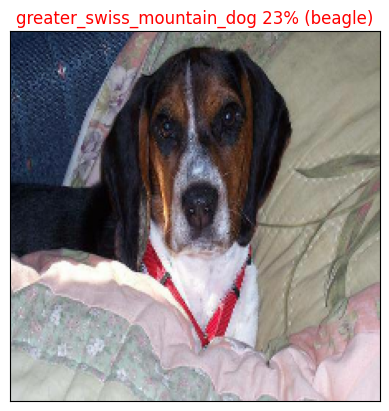

In [ ]:
plot_pred(preds,val_lab,val_img,n=111)

In [26]:
from sklearn.metrics import confusion_matrix

In [ ]:
len(val_lab)

200

TRAINING THE MODEL ON FULL DATA

In [ ]:
len(X),len(Y)

(10222, 10222)

In [27]:
full_data = batch(X,Y)

Creating training data batches...


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [28]:
full_model = createe_model()

building with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [29]:


# TensorBoard callback
full_model_tensorboard = tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
%tensorboard --logdir drive/My Drive/dog/logs

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2023-07-10 22:46:13.691775: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]

In [ ]:
full_model.fit(x=full_data,epochs=num_epochs,callbacks=[full_model_tensorboard,
                          full_model_early_stopping])

In [36]:
!git clone "https://github.com/PavanMutyla/Dog_breed.git"


Cloning into 'Dog_breed'...


In [37]:
!git add .


fatal: not a git repository (or any of the parent directories): .git


In [39]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [40]:
!git add .

error: 'Dog_breed/' does not have a commit checked out
fatal: adding files failed


In [41]:
!git commit -m "first commit"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@9e6345b0590f.(none)')


In [42]:
!git config --global user.email"mutyalapavan9@gmail.com"
!git config --global user.name"PavanMutyla"
!git commit -m "first"
!gir

In [43]:
!git commit -m "first commit"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@9e6345b0590f.(none)')
